<a href="https://colab.research.google.com/github/surbhiagrawal22/rep0/blob/master/Classfication_task_using_neural_network_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the necassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,cohen_kappa_score,accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# reading the two dataset from local folder
pd.set_option("display.max_columns",24)
red_wine_data=pd.read_csv("/content/winequality-red.csv",sep=";")
white_wine_data=pd.read_csv("/content/winequality-white.csv",sep=";")

# checking the data head,tail and sample
print(red_wine_data.head(5))
print(red_wine_data.tail(5))
print(red_wine_data.sample(n=5))
print(white_wine_data.head(5))
print(white_wine_data.tail(5))
print(white_wine_data.sample(n=5))

In [ ]:
# checking the red wine dataset for null values and statistical values
print(red_wine_data.info())
print(red_wine_data.describe())
# checking the white wine dataset for null values and statistical values
print(white_wine_data.info())
print(white_wine_data.describe())

In [ ]:
# building a histogram for both dataset alcohol columns

fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].hist(red_wine_data["alcohol"],label="redwine",color="red")
ax[1].hist(white_wine_data["alcohol"],label="whitewine",color="green")
ax[0].set_xlabel("Alcohol percentage in volume")
ax[1].set_xlabel("Alcohol percentage in volume")
ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")
ax[0].set_ylim([0,1000])
ax[1].set_ylim([0,1000])
fig.legend()
fig.suptitle("Percentage of alcohol in red wine and white wine")
plt.show()

In [ ]:
# building a scatter plot of quality and sulphates for both dataset 

fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].scatter(red_wine_data["quality"],red_wine_data["sulphates"],color="red",label="RED wine")
ax[1].scatter(white_wine_data["quality"],white_wine_data["sulphates"],color="green",label="white wine")
ax[0].set_xlabel("quality")
ax[1].set_xlabel("quality")
ax[0].set_ylabel("sulphates")
ax[1].set_ylabel("sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
ax[0].set_title("Red wine data")
ax[1].set_title("White wine data")
fig.suptitle("scatter plot of quality vs sulphates in rediwneand whitewine")
fig.legend()
plt.show()

In [ ]:
# calculating the co-relation and building a pairplot of white wine data
white_wine_data_correlation=white_wine_data.corr()
sns.pairplot(white_wine_data,corner=True)

In [ ]:

# calculating the co-relation and building a pairplot of red wine data
red_wine_data_correlation=red_wine_data.corr()
sns.pairplot(red_wine_data,corner=True)

In [ ]:
# drawing heatmap for red_wine_data and whote_wine_data separately to analyse co-relation
fig,ax=plt.subplots(1,2)
sns.heatmap(red_wine_data_correlation,ax=ax[0],square=True)
# fig.subplots_adjust(left=1,right=5,top=5,bottom=1,wspace=1,hspace=3)
sns.heatmap(white_wine_data_correlation,ax=ax[1],square=True)

In [ ]:
# adding new column on each data set and then combining both datasets into one
red_wine_data["category"]=1
white_wine_data["category"]=0
white_wine_data=white_wine_data.append(red_wine_data,ignore_index=True)
# checking if appending takes p;ace proplery
print(white_wine_data.tail(6))
print(white_wine_data.shape)

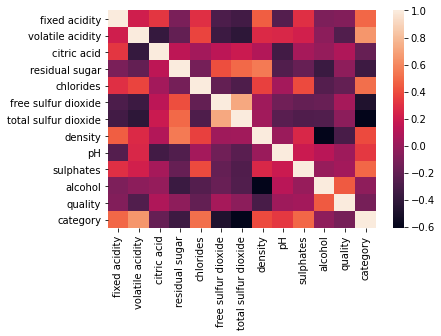

In [ ]:
# building a co-realtion heat map for whole dataset
whole_data_corelation=white_wine_data.corr()
# sns.heatmap(whole_data_corelation,annot=True,linecolor="black",linewidths="2",cbar=True)
sns.heatmap(whole_data_corelation,cbar=True,robust=True)

In [ ]:
# performing train test split
X=white_wine_data.drop(["category"],axis=1)
# print(white_wine_data.shape)
# print(X.shape)
y=white_wine_data["category"]
seed_no=7
np.random.seed(seed_no)
# use straify to ensure data with less values of target values are splitted in equal format in both datasets
train_X,test_X,train_y,test_y= train_test_split(X,y,test_size=.2,stratify=y,random_state=seed_no)

# checking the shape for train_X,test_X,train_y,test_y
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

# checking for values ocunts in both data
print(train_y.value_counts())
print(test_y.value_counts())

In [ ]:
# standaradise the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_X=scaler.fit_transform(train_X)
test_X=scaler.fit_transform(test_X)

In [ ]:
# printing values after standarising
print(train_X)
print(test_X)


print(train_X.shape)

In [ ]:
# Defining a new Sequential  model
model=tf.keras.models.Sequential()

# defining the input layer
model.add(tf.keras.layers.Dense(12,input_shape=(12,),  activation="relu"))

# defining the hiden layer
model.add(tf.keras.layers.Dense(8, activation="relu"))

# defining the output layer
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# checking the various attributes of model

# defining the input shape
print(model.input_shape)
# defining the output shape
print(model.output_shape)
# summary
print(model.summary())
# Model config
print(model.get_config())
# List all weight tensors 
print(model.get_weights())

In [ ]:
from sklearn.metrics import classification_report
# compiling the model AND DEFINING THE OPTIMIZER AND LOSS FUNCTION
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

#training the model and saving it in variable model_fit , we can access history of the model 
model_fit=model.fit(train_X,train_y,epochs=20, batch_size=1, verbose=1  )

# PREDICTING USING THE MODEL
pred=model.predict(test_X)

# print(pred)
print(test_y)
pred=(pred > 0.5)
print(pred)

# defining the error rate and accuracy rate 
loss,accuracy=model.evaluate(test_X,test_y,verbose=1)
print(f"loss is {loss}")
print(f"Accuracy is {accuracy}")
# priniting the confusion matrix
print(confusion_matrix(pred,test_y))

print( pd.DataFrame(pred).value_counts())
# priniting recall_score
print(f'Recall score is {recall_score(pred,test_y)}') 
# priniting precision_score
print(f'precision score is {precision_score(pred,test_y)}')
# priniting cohen_kappa_score
print(f'kappa score is {cohen_kappa_score(pred,test_y)}')

# printing accuracy_score
print(f'accuracy_score is {accuracy_score(pred,test_y)}')

print(f'classification_report is \n {classification_report(pred,test_y)}')

In [ ]:
# # defining a new model with more hiden layers and usign acativation function is tanh

model1=tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(12,input_shape=(12,),activation="tanh"))
model1.add(tf.keras.layers.Dense(6,activation="tanh"))
model1.add(tf.keras.layers.Dense(3,activation="tanh"))
model1.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


#training the model
model1.fit(train_X,train_y,epochs=20, batch_size=1, verbose=1)

# PREDICTING USING THE MODEL
pred=model1.predict(test_X)

# print(pred)
print(test_y)
pred=(pred > 0.5)
print(pred)

# defining the error rate and accuracy rate 
print(model1.evaluate(test_X,test_y,verbose=1))


# priniting the confusion matrix
print(confusion_matrix(pred,test_y))

print( pd.DataFrame(pred).value_counts())
# priniting recall_score
print(f'Recall score is {recall_score(pred,test_y)}') 
# priniting precision_score
print(f'precision score is {precision_score(pred,test_y)}')
# priniting cohen_kappa_score
print(f'kappa score is {cohen_kappa_score(pred,test_y)}')


print(f'accuracy_score is {accuracy_score(pred,test_y)}') 

In [ ]:
# # defining a new model with more hiden layers

model2=tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(12,input_shape=(12,),activation="tanh"))
model2.add(tf.keras.layers.Dense(9,activation="tanh"))
model2.add(tf.keras.layers.Dense(6,activation="tanh"))
model2.add(tf.keras.layers.Dense(3,activation="tanh"))
model2.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


#training the model
model2.fit(train_X,train_y,epochs=20, batch_size=1, verbose=1)

# PREDICTING USING THE MODEL
pred=model2.predict(test_X)

# print(pred)
print(test_y)
pred=(pred > 0.5)
print(pred)

# defining the error rate and accuracy rate 
print(model2.evaluate(test_X,test_y,verbose=1))


# priniting the confusion matrix
print(confusion_matrix(pred,test_y))

print( pd.DataFrame(pred).value_counts())
# priniting recall_score
print(f'Recall score is {recall_score(pred,test_y)}') 
# priniting precision_score
print(f'precision score is {precision_score(pred,test_y)}')
# priniting cohen_kappa_score
print(f'kappa score is {cohen_kappa_score(pred,test_y)}')
print(f'accuracy_score is {accuracy_score(pred,test_y)}') 

In [ ]:
# # defining a new model with more hiden layers

model3=tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(12,input_shape=(12,),activation="relu"))
model3.add(tf.keras.layers.Dense(9,activation="relu"))
model3.add(tf.keras.layers.Dense(6,activation="relu"))
model3.add(tf.keras.layers.Dense(3,activation="relu"))
model3.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model3.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


#training the model
model3.fit(train_X,train_y,epochs=20, batch_size=1, verbose=1)

# PREDICTING USING THE MODEL
pred=model3.predict(test_X)

# print(pred)
print(test_y)
pred=(pred > 0.5)
print(pred)

# defining the error rate and accuracy rate 
print(model3.evaluate(test_X,test_y,verbose=1))


# priniting the confusion matrix
print(confusion_matrix(pred,test_y))

print( pd.DataFrame(pred).value_counts())
# priniting recall_score
print(f'Recall score is {recall_score(pred,test_y)}') 
# priniting precision_score
print(f'precision score is {precision_score(pred,test_y)}')
# priniting cohen_kappa_score
print(f'kappa score is {cohen_kappa_score(pred,test_y)}')
print(f'accuracy_score is {accuracy_score(pred,test_y)}') 

In [ ]:
# # defining a new model with more hiden layers

model3=tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(48,input_shape=(12,),activation="relu"))
model3.add(tf.keras.layers.Dense(24,activation="relu"))
model3.add(tf.keras.layers.Dense(12,activation="relu"))
model3.add(tf.keras.layers.Dense(6,activation="relu"))
model3.add(tf.keras.layers.Dense(3,activation="relu"))
model3.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model3.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


#training the model
model3.fit(train_X,train_y,epochs=20, batch_size=1, verbose=1)

# PREDICTING USING THE MODEL
pred=model3.predict(test_X)

# print(pred)
print(test_y)
pred=(pred > 0.5)
print(pred)

# defining the error rate and accuracy rate 
print(model3.evaluate(test_X,test_y,verbose=1))


# priniting the confusion matrix
print(confusion_matrix(pred,test_y))

print( pd.DataFrame(pred).value_counts())
# priniting recall_score
print(f'Recall score is {recall_score(pred,test_y)}') 
# priniting precision_score
print(f'precision score is {precision_score(pred,test_y)}')
# priniting cohen_kappa_score
print(f'kappa score is {cohen_kappa_score(pred,test_y)}')
print(f'accuracy_score is {accuracy_score(pred,test_y)}') 

In [ ]:
# creating a model using "quality" as a response variable 
print(white_wine_data.shape)
# dropping quality column from dataset
X=white_wine_data.drop(["quality"],axis=1)

# using only quality column as response varaible in y
y=white_wine_data["quality"]

 # chekcing the shape of varaible
print(X.shape)
print(y.shape)

# use straify to ensure data with less values of target values are splitted in equal format in both datasets
train_X,test_X,train_y,test_y= train_test_split(X,y,test_size=.2,stratify=y,random_state=7)

# checking the shape for train_X,test_X,train_y,test_y
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

# checking for values ocunts in both data
print(train_y.value_counts())
print(test_y.value_counts())


In [ ]:
# standaradise the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_X=scaler.fit_transform(train_X)
test_X=scaler.fit_transform(test_X)
print(train_X)
print(test_X)

In [ ]:
# building a model for linear regression with one input layer and one output layer
# defining the model
Model=tf.keras.models.Sequential()
# defining the input layer
Model.add(tf.keras.layers.Dense(12,input_shape=(12,),activation="relu"))
# defining the output layer, no activation function is required
Model.add(tf.keras.layers.Dense(1))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
Model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])
Model.fit(train_X,train_y,epochs=20, batch_size=1, verbose=1)

# PREDICTING USING THE MODEL
pred=Model.predict(test_X)

# defining the error rate and accuracy rate 
print(Model.evaluate(test_X,test_y,verbose=1))

print(f'mean_absolute_error is {mean_absolute_error(pred,test_y)}') 
print(f'mean_squared_error is {mean_squared_error(pred,test_y)}') 

print(f'r2_score is {r2_score(pred,test_y)}') 

In [ ]:
# building a model considering quality as a multi-class categorical variable 

# defining the model
Model=tf.keras.models.Sequential()
# defining the input layer
Model.add(tf.keras.layers.Dense(12,input_shape=(12,),activation="relu"))
# defining the output layer
Model.add(tf.keras.layers.Dense(1,activation="sigmoid"))


Model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
Model.fit(train_X,train_y,epochs=20, batch_size=1, verbose=1)

# PREDICTING USING THE MODEL
pred=Model.predict(test_X)

pred=(pred>.5)
print(pred)
# defining the error rate and accuracy rate 
print(Model.evaluate(test_X,test_y,verbose=1))


# printing the confusion matrix
print(confusion_matrix(pred,test_y))

print( pd.DataFrame(pred).value_counts())
# printing recall_score
print(f'Recall score is {recall_score( pred,test_y,average=None)}') 
# printing precision_score
print(f'precision score is {precision_score(pred,test_y,average=None)}')
# printing cohen_kappa_score
print(f'kappa score is {cohen_kappa_score(pred,test_y)}')
# printing accuracy score
print(f'accuracy_score is {accuracy_score(pred,test_y,average=None)}') 